# Numpy and Pandas

In [113]:
import pandas as pd
import numpy as np

In [ ]:
print("hello")

## Numpy

### Varför numpy

- Numpy är skrivet i C
- Python är en dynamiskt typad språk interpertat språk - dvs otroligt långsamt
- C är ett statiskt typat kompilerat språk - dvs otroligt snabbt

Numpy arrayer kan endast ha en datatyp

In [ ]:
lst = list([1, 2, 3, 4, "Hej"])
print(lst)

arr = np.array(lst)
print(arr)

arr = np.array([1, 2, 3, 4], dtype=np.int8)
print(arr)
arr.dtype


Det finns inbyggda funktioner för att skapa arrayer
De kan också vara och är oftast multidimensionella

In [ ]:
range_array = np.arange(1, 43).reshape(2, 21)
print(range_array)
ones_array = np.ones((9, 3), dtype=np.int64) 
print(ones_array)
print(ones_array.shape)
ones_array = ones_array.reshape((3,9))
ones_array

In [ ]:
ones_array[0] = 0
ones_array[1] = 1
ones_array[2] = 2
print(ones_array[:2])
print(ones_array[1:])
print(ones_array[1:,1:4 ])
print(ones_array[:,1:4 ])

ones_array

Det finns inbyggda metoder för att gör beräkningar på arrayer

In [ ]:
print(range_array[0].prod())
print(range_array.max())
print(range_array.min())
print(range_array.sum(axis=0))
print(range_array.cumprod())
range_array

Numpy har några inbyggda konstanter som vi kan nyttja, exempelvis

In [ ]:
np.pi
np.nan
np.Infinity

Vi kan iterera över en array

In [ ]:
for thing in range_array:
    print(thing)

for thing in np.nditer(range_array):
    print(thing)

range_array += 10
range_array

## Pandas

### Varför pandas

- Pandas är byggt på numpy och är skrivet i C, dvs snabbt
- Pandas är en dataanalysbibliotek, lätt att läsa in
- Lätt att ha strukturerad data

I pandas jobbar vi med dataframes on series oftast

In [ ]:
my_data_dict = {
    "person": ["Anton", "Anton", "John", "Sven", "Pei", "Lisa", "Ann"],
    "age": [31, 12, 56, 1, 33, 37, 98]
}
df_from_dict = pd.DataFrame(my_data_dict)
df_from_dict


In [ ]:
df_from_dict.iloc[0]
df_from_dict["age"]
df_from_dict["person"]
df_from_dict["person"][:5]
df_from_dict.iloc[0]["person"]

In [ ]:
people = df_from_dict["person"]
people.name
people.size
people.hasnans
people.value_counts()

Pandas är bra för import av data från filer

In [ ]:
df = pd.read_csv("data.csvt")
df

In [ ]:
df.shape
filtered_df = df.filter(["talare", "parti", "dok_nummer"])
filtered_df["dok_nummer"].max()
filtered_df["dok_nummer"].min()
filtered_df["dok_nummer"].cumprod()
filtered_df["talare"].value_counts()
filtered_df = filtered_df.drop(["dok_nummer"], axis=1)
filtered_df = filtered_df.drop(0, axis=0)
filtered_df

Vi kan importera json, antingen från respone i api eller från fil

In [ ]:
import requests

res = requests.get("http://127.0.0.1:8000/todos")
if not res.status_code == 200:
    print("HTTP error bruh")

df_from_json_res = pd.read_json(res.text)
df_from_json_res


In [ ]:
df_from_json_file = pd.read_json("../lesson11/seed.json")
df_from_json_file

Pandas kan också göra sql queries

In [ ]:
import sqlite3

conn = sqlite3.connect("../lesson11/todo.db")

df_from_sql_query = pd.read_sql("SELECT * FROM todo", con=conn)
df_from_sql_query

Vi kan lägga till tabeller i en dataframe

In [132]:
df = pd.read_csv("data.csvt")
filtered_df = df.filter(["talare", "parti", "anforandetext"])
text_lenght = pd.Series(name="text_length", data=[len(row) for row in df["anforandetext"]])
# df["text_length"] = 1
text_lenght
filtered_df["text_lenght"] = text_lenght
df = pd.concat([df, filtered_df], axis=1)
filtered_df["text_lenght"].hasnans
df["text_lenght"].hasnans

,dok_id,dok_rm,dok_nummer,dok_datum,avsnittsrubrik,kammaraktivitet,anforande_nummer,talare,parti,anforandetext,intressent_id,rel_dok_id,replik,talare,parti,anforandetext,text_lenght
0,HA091,2022/23,1,2022-09-26 00:00:00,Hälsningsanförande från ålderspresidenten,NaN,1,Carina Ohlsson (S),S,Ärade riksdagsledamöter! Mina damer och herra...,8.599683e+11,NaN,N,Carina Ohlsson (S),S,Ärade riksdagsledamöter! Mina damer och herra...,1162
1,HA091,2022/23,1,2022-09-26 00:00:00,Val av förste vice talman,NaN,10,Gunilla Carlsson (S),S,Fru ålderspresident! Jag vill å den socialdem...,8.752213e+11,NaN,N,Gunilla Carlsson (S),S,Fru ålderspresident! Jag vill å den socialdem...,724
2,HA091,2022/23,1,2022-09-26 00:00:00,Val av förste vice talman,NaN,11,Annie Lööf (C),C,Fru ålderspresident och ärade ledamöter av Sv...,8.628683e+11,NaN,N,Annie Lööf (C),C,Fru ålderspresident och ärade ledamöter av Sv...,591
3,HA091,2022/23,1,2022-09-26 00:00:00,Val av andre vice talman,NaN,12,Henrik Vinge (SD),SD,Fru ålderspresident! Jag vill börja med att g...,4.068319e+11,NaN,N,Henrik Vinge (SD),SD,Fru ålderspresident! Jag vill börja med att g...,2915
4,HA091,2022/23,1,2022-09-26 00:00:00,Val av andre vice talman,NaN,13,Annika Hirvonen (MP),MP,Fru ålderspresident! När vetskapen om Moderat...,8.196016e+11,NaN,N,Annika Hirvonen (MP),MP,Fru ålderspresident! När vetskapen om Moderat...,7226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,HA099,2022/23,9,2022-10-17 00:00:00,Prövning av förslag till statsminister,NaN,5,Per Bolund (MP),MP,Herr talman! Ärade ledamöter! Sverige är ett ...,9.564443e+11,NaN,N,Per Bolund (MP),MP,Herr talman! Ärade ledamöter! Sverige är ett ...,8027
3892,HA099,2022/23,9,2022-10-17 00:00:00,Prövning av förslag till statsminister,NaN,6,Annie Lööf (C),C,STYLEREF Kantrubrik \* MERGEFORMAT Prövning ...,8.628683e+11,NaN,N,Annie Lööf (C),C,STYLEREF Kantrubrik \* MERGEFORMAT Prövning ...,5234
3893,HA099,2022/23,9,2022-10-17 00:00:00,Prövning av förslag till statsminister,NaN,7,Jimmie Åkesson (SD),SD,Herr talman! Det är inte vi här inne i riksda...,5.120752e+10,NaN,N,Jimmie Åkesson (SD),SD,Herr talman! Det är inte vi här inne i riksda...,4713
3894,HA099,2022/23,9,2022-10-17 00:00:00,Prövning av förslag till statsminister,NaN,8,Ebba Busch (KD),KD,STYLEREF Kantrubrik \* MERGEFORMAT Prövning ...,5.125107e+11,NaN,N,Ebba Busch (KD),KD,STYLEREF Kantrubrik \* MERGEFORMAT Prövning ...,5645


In [140]:
filtered_df.to_csv("my_csv.csv")
filtered_df.to_json("my_json.json")
filtered_df.to_html("my_html.html")
# filtered_df.to_sql("my_sql.sql")
filtered_df

,talare,parti,anforandetext,text_lenght
0,Carina Ohlsson (S),S,Ärade riksdagsledamöter! Mina damer och herra...,1162
1,Gunilla Carlsson (S),S,Fru ålderspresident! Jag vill å den socialdem...,724
2,Annie Lööf (C),C,Fru ålderspresident och ärade ledamöter av Sv...,591
3,Henrik Vinge (SD),SD,Fru ålderspresident! Jag vill börja med att g...,2915
4,Annika Hirvonen (MP),MP,Fru ålderspresident! När vetskapen om Moderat...,7226
...,...,...,...,...
3891,Per Bolund (MP),MP,Herr talman! Ärade ledamöter! Sverige är ett ...,8027
3892,Annie Lööf (C),C,STYLEREF Kantrubrik \* MERGEFORMAT Prövning ...,5234
3893,Jimmie Åkesson (SD),SD,Herr talman! Det är inte vi här inne i riksda...,4713
3894,Ebba Busch (KD),KD,STYLEREF Kantrubrik \* MERGEFORMAT Prövning ...,5645


Vi kan plota data från en dataframe, men då måste matplotlib installeras

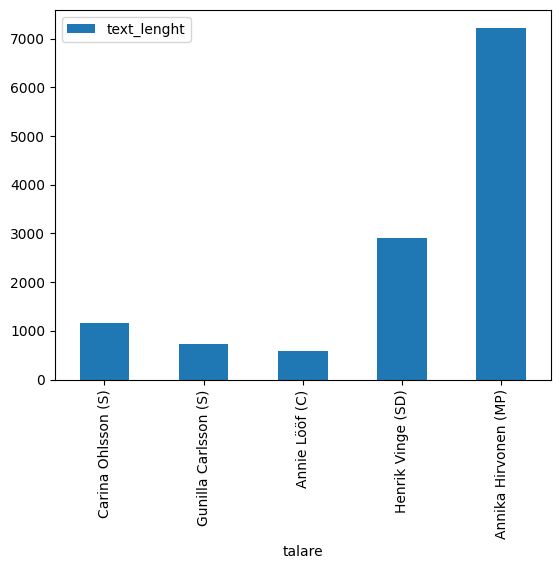

In [149]:
plot = filtered_df[:5].plot(x="talare", y="text_lenght", kind="bar")
plot.figure.savefig("test.svg", format="svg")